In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
# Must import comet before torch, sometimes throws error otherwise.
from img_wang.callbacks import CometCallbackWithGrads
from fastai2.vision.all import show_image, show_images
import matplotlib.pyplot as plt
import numpy as np
import os
import pandas as pd
from pathlib import Path
import torch
import torch.nn as nn
import torch.nn.functional as F

from htools import *
from img_wang.data import load_img, get_databunch
from img_wang.models import Encoder, SingleInputBinaryModel, \
    TorchvisionEncoder
from img_wang.utils import gpu_setup
from incendio.callbacks import MetricHistory, ModelCheckpoint, EarlyStopper
from incendio.core import Trainer
from incendio.metrics import mean_soft_prediction, std_soft_prediction, percent_positive

/opt/conda/envs/fastai/lib/python3.7/site-packages/incendio/callbacks.py:25: UserWarning: Accio not available.
  warnings.warn('Accio not available.')


In [3]:
cd_root()
gpu_setup()

Current directory: /storage/img-wang
Setting seeds for reproducible training.


## Cleaned up and ported DS

In [10]:
dst, dsv, dlt, dlv = get_databunch('data/imagewang-160/unsup/', 
                                   mode='patchwork', bs=768, pct_pos=.5, 
                                   max_train_len=3000, max_val_len=3000, 
                                   debug_mode=None)

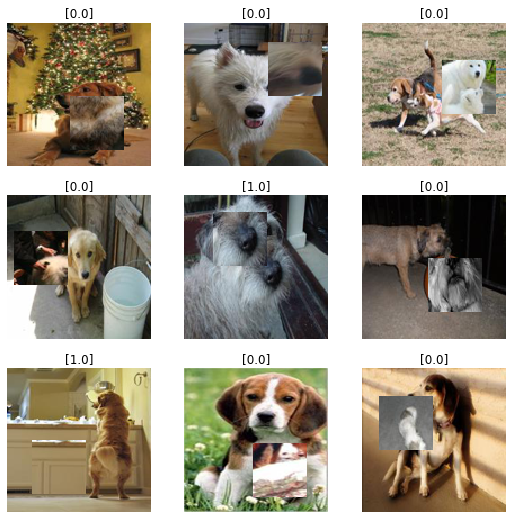

In [11]:
xb, yb = next(iter(dlt))
show_images(xb[:9], nrows=3, titles=yb[:9].tolist())

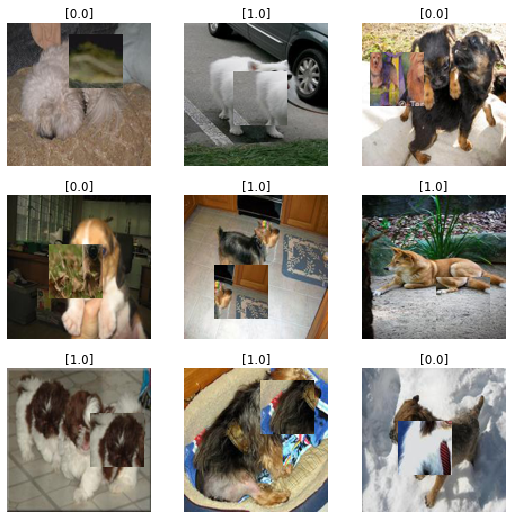

In [12]:
xv, yv = next(iter(dlv))
show_images(xv[:9], nrows=3, titles=yv[:9].tolist())

In [13]:
# net = SingleInputBinaryModel(TorchvisionEncoder(), 
#                              nn.Linear(2560, 1))

net = SingleInputBinaryModel(Encoder(), 
                             nn.Linear(512, 1))

In [14]:
t = Trainer(net, dst, dsv, dlt, dlv, F.binary_cross_entropy_with_logits,
            mode='binary', out_dir='data/models/tmp', last_act=torch.sigmoid,
            metrics=[mean_soft_prediction, std_soft_prediction, percent_positive])
t.fit(2, [1e-5, 1e-4, 1e-4])

2020-09-12 05:15:03,508 [INFO]: Adam (
Parameter Group 0
    amsgrad: False
    betas: (0.9, 0.999)
    eps: 0.001
    lr: 1e-05
    weight_decay: 0

Parameter Group 1
    amsgrad: False
    betas: (0.9, 0.999)
    eps: 0.001
    lr: 0.0001
    weight_decay: 0

Parameter Group 2
    amsgrad: False
    betas: (0.9, 0.999)
    eps: 0.001
    lr: 0.0001
    weight_decay: 0
)




=====

Epoch 0

| Metric               |   Train |   Validation |
|----------------------|---------|--------------|
| loss                 |  0.7061 |       0.6931 |
| mean_soft_prediction |  0.5343 |       0.4969 |
| std_soft_prediction  |  0.0589 |       0.0001 |
| percent_positive     |  0.7257 |       0.0000 |





=====

Epoch 1

| Metric               |   Train |   Validation |
|----------------------|---------|--------------|
| loss                 |  0.6994 |       0.6931 |
| mean_soft_prediction |  0.4694 |       0.5045 |
| std_soft_prediction  |  0.0688 |       0.0001 |
| percent_positive     |  0.3429 |       1.0000 |


Training complete. Model in eval mode.


Search notes/misc.txt for "Batch size experiments" to view notes on the results.